<h3>Outlier removal using z score</h3>

In [1]:
# this method works only on normaly distributed data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [8]:
df.sample(5)

,cgpa,placement_exam_marks,placed
217,6.92,16.0,0
980,6.18,27.0,0
100,6.56,46.0,0
10,6.82,16.0,1
384,7.03,33.0,0


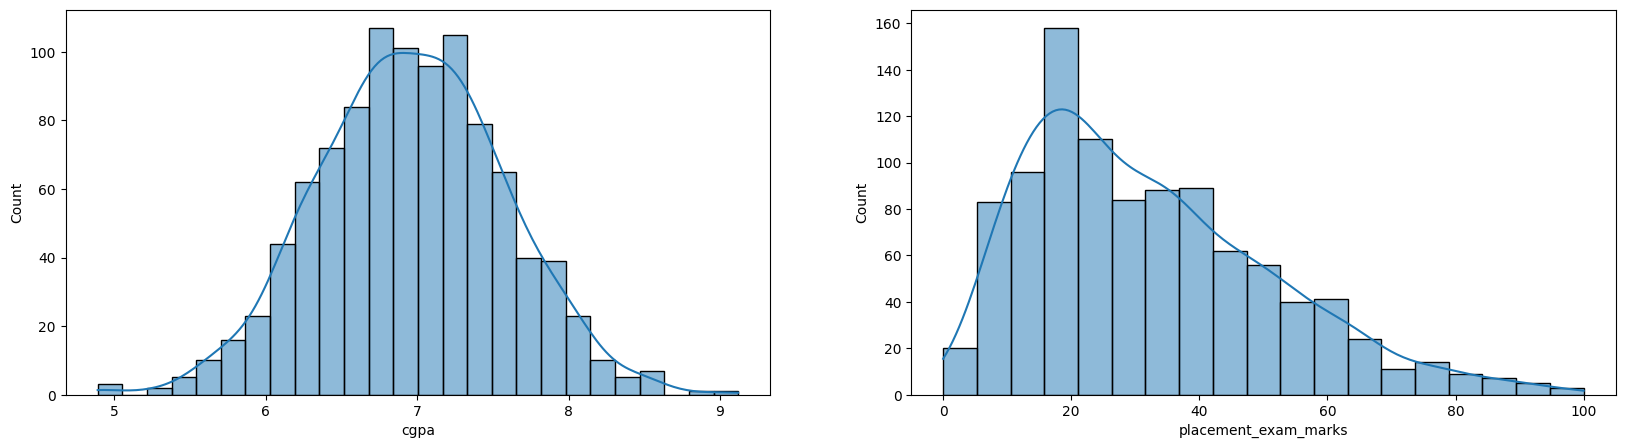

In [15]:
#first we will check distribution of data 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(df["cgpa"],kde=True,)
plt.subplot(1,2,2)
sns.histplot(df["placement_exam_marks"],kde=True)
plt.show()

In [16]:
# boundary values
print("highest value allowed for cgpa",df["cgpa"].mean() + 3*df["cgpa"].std())
print("lower value allowed for cgpa",df["cgpa"].mean() - 3*df["cgpa"].std())

highest value allowed for cgpa 8.808933625397168
lower value allowed for cgpa 5.113546374602832


In [26]:
#finding outliers
df_1=df[(df["cgpa"] >8.808933625) | (df["cgpa"]<5.1135463746)]
df_1

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


trimming

In [27]:
# Trimming
new_df = df[(df["cgpa"]>5.1135463746) & (df["cgpa"]<8.808933)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [28]:
# using z-score
df["cgpa_zscore"] = ((df["cgpa"] - df["cgpa"].mean())/df["cgpa"].std())
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [30]:
# detection of outliers
df[(df["cgpa_zscore"]>3) | (df["cgpa_zscore"]<-3)]


,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [31]:
# triming
new_df = df[(df["cgpa_zscore"]>-3)&(df["cgpa_zscore"]<3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


capping

In [33]:
upper_limit=df["cgpa"].mean() + 3*df["cgpa"].std()
lower_limit=df["cgpa"].mean() - 3*df["cgpa"].std()

In [35]:
df["cgpa"] = np.where(df["cgpa"]>upper_limit,upper_limit,
                    np.where(df["cgpa"]<lower_limit,lower_limit,
                    df["cgpa"]))
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
